In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib as mpl


In [2]:
prescriber = pd.read_csv('clean_prescriber.csv')
prescriber.head(5)

,Gender_is__M,State_is__AL,State_is__AR,State_is__AZ,State_is__CA,State_is__CO,State_is__CT,State_is__DC,State_is__DE,State_is__FL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [3]:
X = prescriber.iloc[:,:-1]
y = prescriber['Opioid.Prescriber']

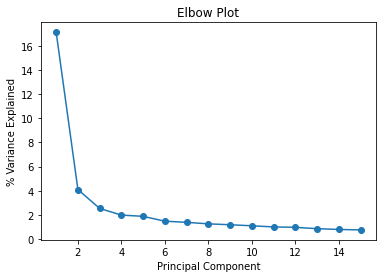

In [4]:
X_z = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)
pcs = PCA().fit(X_z)
explained_variance_ratio_10 = pcs.explained_variance_ratio_[:15]
plt.plot(np.arange(1, len(explained_variance_ratio_10)+1, 1), explained_variance_ratio_10*100, "o-")
# plt.plot(np.arange(1, len(pcs.explained_variance_ratio_)+1, 1), pcs.explained_variance_ratio_*100, "o-")
plt.xlabel("Principal Component")
plt.ylabel("% Variance Explained")
plt.title("Elbow Plot")
plt.show()


In [5]:
pca_result = PCA(n_components=2).fit_transform(X_z)
pca_X = pd.DataFrame( columns=['pca_dim_1','pca_dim_2','y'])
pca_X.pca_dim_1, pca_X.pca_dim_2, pca_X.y = pca_result[:,0],pca_result[:,1],y
pca_X

,pca_dim_1,pca_dim_2,y
0,-3.239835,-0.103697,1
1,-0.908053,0.742855,1
2,-2.381004,1.416773,0
3,0.421750,-0.058133,1
4,-2.716133,0.003233,1
...,...,...,...
24985,-0.367991,-0.640194,1
24986,-2.329987,-0.030673,1
24987,-3.173221,-0.108223,1
24988,-1.787660,-0.164481,1


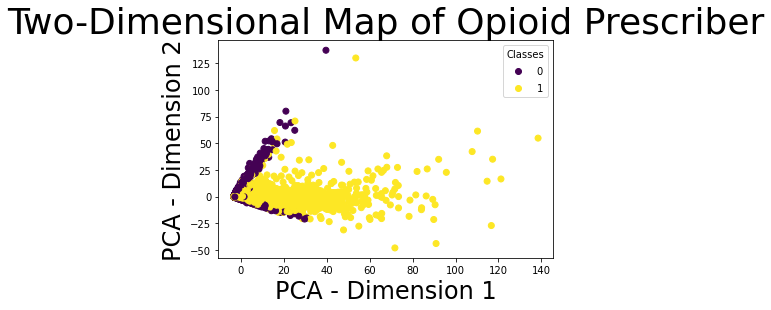

In [6]:
scatter = plt.scatter(pca_X.pca_dim_1, pca_X.pca_dim_2, c=pca_X.y)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title('Two-Dimensional Map of Opioid Prescriber', fontsize=36)
plt.xlabel('PCA - Dimension 1', fontsize=24)
plt.ylabel('PCA - Dimension 2', fontsize=24)
plt.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


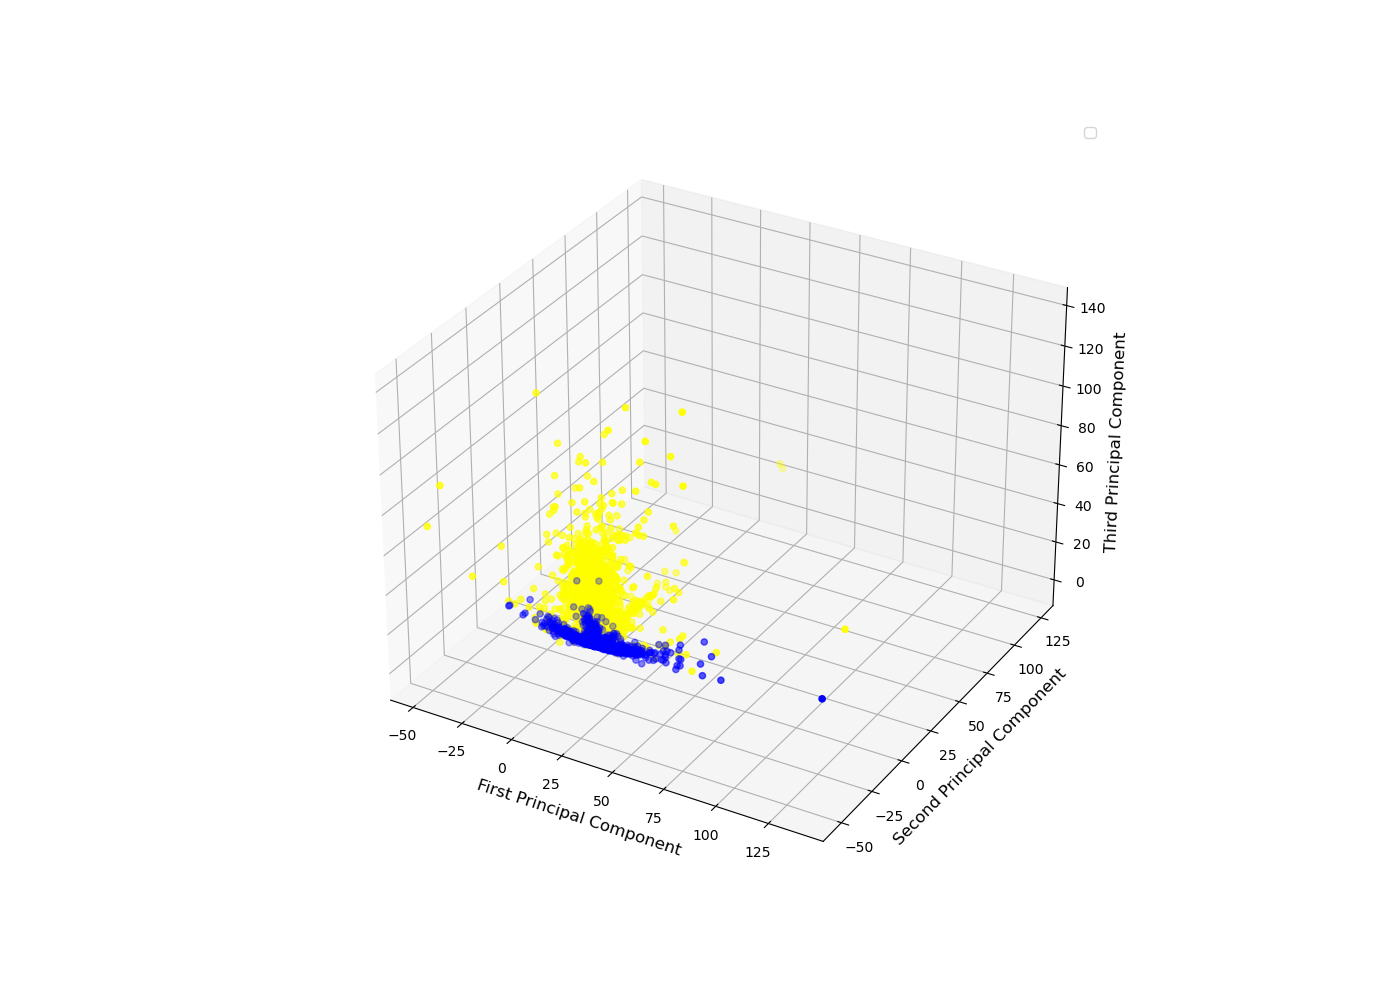

In [10]:
### Reference from https://stackoverflow.com/questions/65241847/how-to-plot-3d-pca-with-different-colors
%matplotlib widget

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_pca = PCA(n_components=3).fit_transform(X_z)

Xax = X_pca[:,1]
Yax = X_pca[:,2]
Zax = X_pca[:,0]

cdict = {0:'blue',1:'yellow'}


fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=12)
ax.set_ylabel("Second Principal Component", fontsize=12)
ax.set_zlabel("Third Principal Component", fontsize=12)

ax.legend()
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_z, y, test_size=0.3, random_state=265)
lr = LogisticRegression(max_iter=5000, n_jobs=-1).fit(x_train, y_train)
accVal = lr.score(x_test, y_test)
print(accVal)


0.9209016940109377


In [9]:
print(X_z.shape)
pco1 = PCA(0.9).fit(X_z)
print(pco1.n_components_)
np.cumsum(pco1.explained_variance_ratio_)

(24990, 346)
211


array([0.17118684, 0.21220141, 0.23759718, 0.25747654, 0.2763288 ,
       0.29115261, 0.30503988, 0.31766706, 0.3295554 , 0.34058495,
       0.35067029, 0.36042603, 0.36905478, 0.37705758, 0.38466991,
       0.39149721, 0.39805412, 0.40428992, 0.41037386, 0.41625007,
       0.42179203, 0.42674943, 0.43165883, 0.43640762, 0.44093659,
       0.44529252, 0.4495176 , 0.45365493, 0.45764607, 0.46153654,
       0.46537203, 0.46907356, 0.47272125, 0.47636234, 0.47991538,
       0.4834023 , 0.48682494, 0.49021599, 0.49358409, 0.4969201 ,
       0.50022983, 0.503525  , 0.50680541, 0.51006707, 0.5133049 ,
       0.51652367, 0.51973815, 0.52293986, 0.52612264, 0.52930056,
       0.5324759 , 0.53563335, 0.53877211, 0.54190059, 0.54502576,
       0.54813394, 0.55122855, 0.55431151, 0.55739269, 0.56046165,
       0.5635173 , 0.56656732, 0.56960722, 0.5726421 , 0.57566305,
       0.57867519, 0.58168656, 0.58469245, 0.58769244, 0.59068393,
       0.59366997, 0.59665127, 0.59962924, 0.60260158, 0.60556

In [10]:
lr = LogisticRegression(solver='saga', penalty='l1', random_state=265, max_iter=5000, n_jobs=-1).fit(x_train, y_train)
accVal = lr.score(x_test, y_test)
print(accVal)


In [ ]:
lr.coef_

array([[ 4.21033475e-02,  1.98201547e-02,  6.40350065e-02,
         4.69688251e-02, -6.45798724e-02,  3.43065521e-02,
        -2.18626835e-02,  1.09436419e-02,  8.63638158e-03,
        -4.45162033e-02, -1.23070509e-02,  1.91701703e-02,
        -8.09430392e-02,  1.06822211e-02, -6.80966657e-02,
        -1.60608984e-02,  8.75081157e-03, -1.11008645e-01,
        -9.67490081e-03, -4.62295418e-02,  0.00000000e+00,
         2.23517402e-03,  1.52717236e-02, -2.05499783e-02,
        -2.16140738e-02, -4.68969290e-02,  2.87508450e-02,
        -6.22800180e-03, -1.23523346e-02, -2.11562602e-02,
         5.06366862e-02, -3.23891775e-02,  5.64243367e-03,
         1.59520831e-02, -1.45662358e-01, -7.04421728e-02,
         8.01154011e-02,  2.19341195e-02, -5.48618929e-02,
        -2.61610508e-02,  1.99648001e-02,  3.36352218e-02,
        -1.68518338e-02, -6.98446038e-03,  0.00000000e+00,
        -1.60811079e-02, -1.20981918e-04, -1.30936208e-02,
         1.48837840e-02, -4.03553394e-02, -1.85660405e-0